In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\customer_charn.csv")
data.shape

(7043, 21)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.drop(["customerID"],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
col_list=[]
for col in data.columns:
    if(data[col].dtype=="object"):
        col_list.append(col)
#col_list
label=LabelEncoder()
for col in col_list:
    data[col]=label.fit_transform(data[col])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


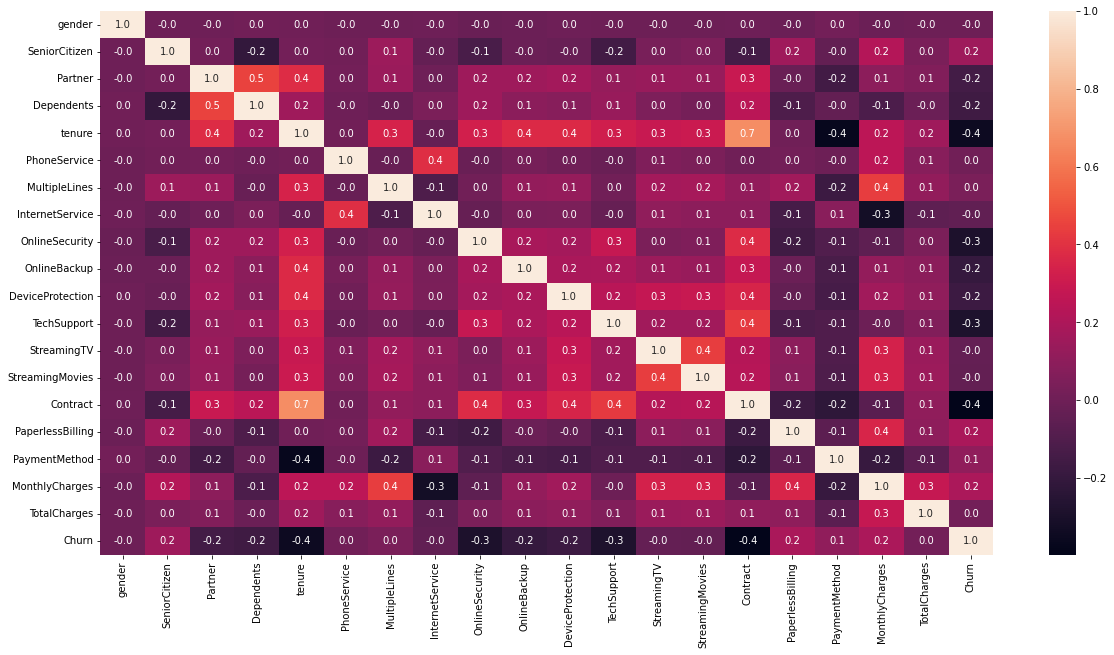

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,fmt=".1f")
plt.show()

In [10]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [11]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

In [12]:
#Feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X=data.drop("Churn",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns))]
vif_data

C:\Users\Aaditya\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,features,VIF
0,gender,1.003324
1,SeniorCitizen,NaN
2,Partner,1.545962
3,Dependents,1.389728
4,tenure,2.868271
5,PhoneService,24.014719
6,MultipleLines,1.400466
7,InternetService,1.676501
8,OnlineSecurity,1.230830
9,OnlineBackup,1.190738


In [13]:
data.drop(["PhoneService"],axis=1,inplace=True)

In [14]:
X=data.drop("Churn",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns))]
vif_data

C:\Users\Aaditya\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
0,gender,1.942714
1,SeniorCitizen,NaN
2,Partner,2.980374
3,Dependents,2.087921
4,tenure,7.743838
5,MultipleLines,2.446585
6,InternetService,2.950906
7,OnlineSecurity,2.372823
8,OnlineBackup,2.598078
9,DeviceProtection,2.761533


In [15]:
data.drop(["tenure"],axis=1,inplace=True)

In [16]:
X=data.drop("Churn",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns))]
vif_data

C:\Users\Aaditya\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
0,gender,1.940750
1,SeniorCitizen,NaN
2,Partner,2.854649
3,Dependents,2.080451
4,MultipleLines,2.352651
5,InternetService,2.944795
6,OnlineSecurity,2.331436
7,OnlineBackup,2.518084
8,DeviceProtection,2.738585
9,TechSupport,2.493981


In [17]:
data.drop(["MonthlyCharges"],axis=1,inplace=True)

In [18]:
X=data.drop("Churn",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns))]
vif_data

C:\Users\Aaditya\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
0,gender,1.889572
1,SeniorCitizen,NaN
2,Partner,2.807669
3,Dependents,2.078277
4,MultipleLines,1.974601
5,InternetService,2.584164
6,OnlineSecurity,2.321040
7,OnlineBackup,2.460116
8,DeviceProtection,2.682861
9,TechSupport,2.489923


In [19]:
data.drop(["SeniorCitizen"],axis=1,inplace=True)

In [20]:
X=data.drop("Churn",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,gender,1.889572
1,Partner,2.807669
2,Dependents,2.078277
3,MultipleLines,1.974601
4,InternetService,2.584164
5,OnlineSecurity,2.321040
6,OnlineBackup,2.460116
7,DeviceProtection,2.682861
8,TechSupport,2.489923
9,StreamingTV,3.114945


In [21]:
data.drop(["TotalCharges"],axis=1,inplace=True)

In [22]:
X=data.drop("Churn",axis=1)
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[vif(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,gender,1.867511
1,Partner,2.798790
2,Dependents,2.078269
3,MultipleLines,1.949125
4,InternetService,2.580868
5,OnlineSecurity,2.301498
6,OnlineBackup,2.432523
7,DeviceProtection,2.665481
8,TechSupport,2.483796
9,StreamingTV,3.089644


In [23]:
x=data[vif_data.features]
y=data["Churn"]

In [24]:
#Train-Test and split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train.shape,y_train.shape

((3726, 14), (3726,))

In [25]:
x_test.shape,y_test.shape

((1597, 14), (1597,))

In [26]:
forest=RandomForestClassifier(n_estimators=200,random_state=13)
forest.fit(x_train,y_train)
score=forest.score(x_train,y_train)
print("Train score : ",score)
y_test_predict=forest.predict(x_test)
print("Test Score : ",accuracy_score(y_test_predict,y_test))
#Confusion metrics
confusion_matrix(y_test_predict,y_test)

Train score :  0.9245840042941492
Test Score :  0.7701941139636819


array([[1071,  210],
       [ 157,  159]], dtype=int64)

In [27]:
precision_score(y_test_predict,y_test)

0.43089430894308944

In [28]:
recall_score(y_test_predict,y_test)

0.5031645569620253